## Solución del problema

### 1.Instalación e importación de librerias

In [55]:
"""# Manejo de gráficas
!pip install scikit-plot
# Manejo de gráficas
!pip install scikit-plot
#Manejo de lemmatization spanish
!pip install stanza
"""

'# Manejo de gráficas\n!pip install scikit-plot\n# Manejo de gráficas\n!pip install scikit-plot\n#Manejo de lemmatization spanish\n!pip install stanza\n'

In [56]:
# librería Natural Language Toolkit, usada para trabajar con textos
import nltk
"""# Punkt permite separar un texto en frases.
nltk.download('punkt')"""
# Punkt permite separar un texto en frases.
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ascas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [57]:
#El lemmatizer de NLTK NO funciona en español, por lo que se usará el de Stanza
# Descarga de paquete WordNetLemmatizer, este es usado para encontrar el lema de cada palabra
# ¿Qué es el lema de una palabra? ¿Qué tan dificil puede ser obtenerlo, piensa en el caso en que tuvieras que escribir la función que realiza esta tarea?
#nltk.download('wordnet')
import stanza
stanza.download('es') # descarga el modelo de lematización en español


2024-04-02 20:36:47 INFO: Downloaded file to C:\Users\ascas\stanza_resources\resources.json
2024-04-02 20:36:47 INFO: Downloading default packages for language: es (Spanish) ...
2024-04-02 20:36:49 INFO: File exists: C:\Users\ascas\stanza_resources\es\default.zip
2024-04-02 20:36:54 INFO: Finished downloading models and saved to C:\Users\ascas\stanza_resources


In [58]:
nlp = stanza.Pipeline(lang='es', processors='tokenize,mwt,pos,lemma')

2024-04-02 20:36:55 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2024-04-02 20:36:56 INFO: Downloaded file to C:\Users\ascas\stanza_resources\resources.json
2024-04-02 20:36:56 INFO: Loading these models for language: es (Spanish):
| Processor | Package         |
-------------------------------
| tokenize  | ancora          |
| mwt       | ancora          |
| pos       | ancora_charlm   |
| lemma     | ancora_nocharlm |

2024-04-02 20:36:56 INFO: Using device: cpu
2024-04-02 20:36:56 INFO: Loading: tokenize
2024-04-02 20:36:56 INFO: Loading: mwt
2024-04-02 20:36:56 INFO: Loading: pos
2024-04-02 20:36:57 INFO: Loading: lemma
2024-04-02 20:36:57 INFO: Done loading processors!


In [59]:
# Instalación de librerias
import pandas as pd
import numpy as np
import sys

#Usados en el proyecto 1
from nltk.tokenize import WordPunctTokenizer 
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



######################################



#!{sys.executable} -m pip install pandas-profiling

import re, string, unicodedata

#from nltk import word_tokenize, sent_tokenize


from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix


from sklearn.base import BaseEstimator, ClassifierMixin

import matplotlib.pyplot as plt

### 2. Perfilamiento y entendimiento de los datos

#### 2.1 Lectura de los Datos

In [60]:
# Uso de la libreria pandas para la lectura de archivos
data=pd.read_csv('train_reviews.csv', sep=',', encoding = 'utf-8')
# Asignación a una nueva variable de los datos leidos
data_train=data

In [61]:
data_train

,Review,Class
0,Muy buena atención y aclaración de dudas por p...,5
1,Buen hotel si están obligados a estar cerca de...,3
2,"Es un lugar muy lindo para fotografías, visite...",5
3,Abusados con la factura de alimentos siempre s...,3
4,Tuvimos un par de personas en el grupo que rea...,3
...,...,...
7870,"Me parece buen sistema, agiliza el transporte,...",4
7871,"Fue una escapada de un día desde el complejo, ...",4
7872,La Plaza de la Revolución es un lugar emblemát...,3
7873,Es la segunda ocasión que me quedo en los cuar...,1


In [62]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7875 entries, 0 to 7874
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  7875 non-null   object
 1   Class   7875 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 123.2+ KB


## 2.2 Entendimiento de los datos

In [63]:
from scipy import stats as st

textos = data_train.copy()
textos['Conteo'] = [len(x) for x in textos['Review']]

#Por ahora: La moda no da información relevante
"""def moda(textos):
    for i in textos['Review']: 
        dict = {}
        for x in i.split(' '): 
            print(i)
        
            if x in dict.keys():
                dict[x] += 1
            else:
                dict[x] = 1

        max_key = max(dict, key=dict.get)
        print(max_key)


moda(textos)
"""
#textos['Moda'] =
#Max tiene el máximo tamaño de la palabra
textos['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['Review']]
#Max tiene el minimo tamaño de la palabra
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['Review']]




def frecuenciaPalabras(texto):
    frecuenciaPalabras = {}

    for i in texto: 
        for x in i.split(' '): 
            if x in frecuenciaPalabras.keys():
                frecuenciaPalabras[x] += 1
            else:
                frecuenciaPalabras[x] = 1

    print(frecuenciaPalabras)
    return frecuenciaPalabras



In [64]:
dictFrec = frecuenciaPalabras(textos['Review'])

df_Frecuencias = pd.DataFrame.from_dict(dictFrec, orient='index', columns=['frecuencia'])

df_Frecuencias['palabra'] = df_Frecuencias.index
df_Frecuencias.reset_index(drop=True,inplace=True)


df_Frecuencias['palabra']=[unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore') for word in df_Frecuencias['palabra']]

{'Muy': 461, 'buena': 958, 'atención': 602, 'y': 18843, 'aclaración': 1, 'de': 25036, 'dudas': 31, 'por': 4448, 'parte': 527, 'la': 17275, 'señorita': 30, 'Verónica': 1, 'castillo,': 21, 'atenta': 19, 'amable': 258, 'en': 13617, 'cuestión': 27, 'laborable.': 1, '': 3487, 'Ideal': 17, 'para': 6006, 'descansar': 56, 'muy': 5850, 'buenas': 197, 'habitaciónes,': 1, 'limpieza,': 40, 'ordenadas.': 1, 'Buena': 86, 'comida': 1761, 'del': 4051, 'restaurante,variedad': 1, 'comidas': 87, 'Buen': 89, 'hotel': 2641, 'si': 1558, 'están': 534, 'obligados': 5, 'a': 8410, 'estar': 359, 'cerca': 338, 'centro': 398, 'convenciones,': 3, 'pero': 3398, 'el': 13145, 'restaurante': 804, 'necesita': 86, 'mejorar!': 1, 'Frío': 1, 'café': 140, 'flojo': 6, '-': 548, 'un': 8052, 'montón': 246, 'pan': 51, 'personas': 435, 'que': 15619, 'sirve': 60, 'unos': 373, 'uderstanding': 1, 'bu': 1, 'lo': 3650, 'significa': 22, 'servicio.': 127, 'En': 717, 'este': 1612, 'barrio': 43, 'con': 5311, 'tan': 509, 'pocas': 78, 'opc

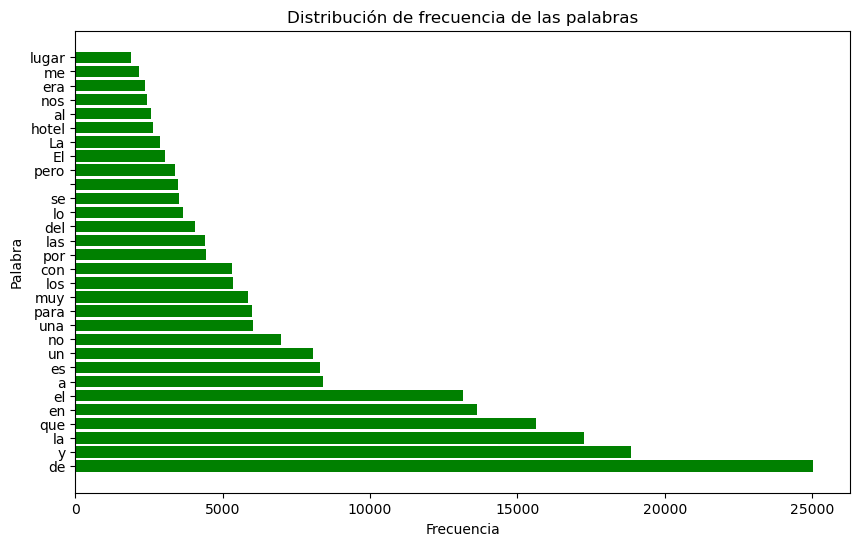

In [65]:
sortedFirst = df_Frecuencias.copy().sort_values(by=['frecuencia'], ascending=False).head(30)



fig = plt.figure(figsize=(10, 6))
plt.barh(sortedFirst['palabra'], sortedFirst['frecuencia'], color='green')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Distribución de frecuencia de las palabras')
plt.show()

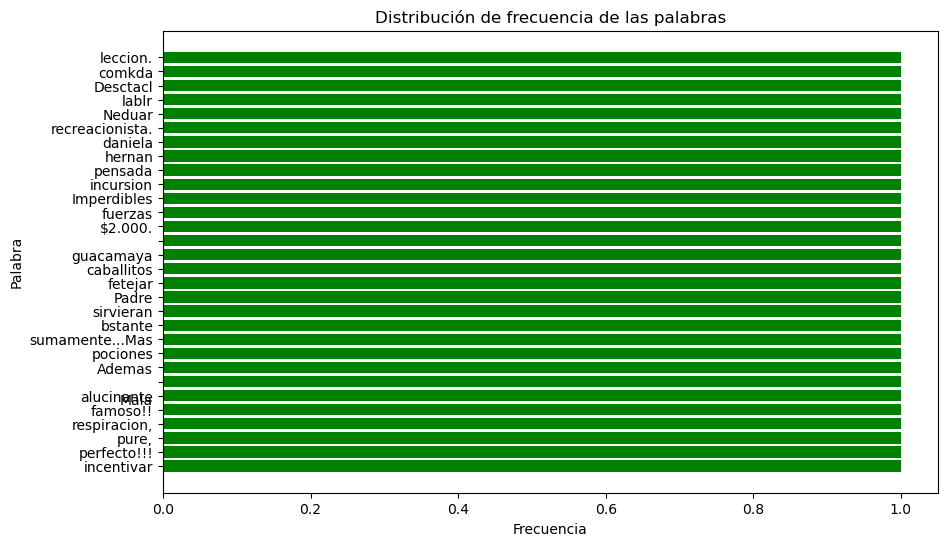

In [66]:
sortedLast= df_Frecuencias.copy().sort_values(by=['frecuencia'], ascending=False).tail(30)

fig2 = plt.figure(figsize=(10, 6))
plt.barh(sortedLast['palabra'], sortedLast['frecuencia'], color='green')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Distribución de frecuencia de las palabras')
plt.show()

In [67]:
textos

,Review,Class,Conteo,Max,Min
0,Muy buena atención y aclaración de dudas por p...,5,252,20,0
1,Buen hotel si están obligados a estar cerca de...,3,297,13,1
2,"Es un lugar muy lindo para fotografías, visite...",5,104,12,1
3,Abusados con la factura de alimentos siempre s...,3,422,14,1
4,Tuvimos un par de personas en el grupo que rea...,3,419,14,1
...,...,...,...,...,...
7870,"Me parece buen sistema, agiliza el transporte,...",4,113,11,2
7871,"Fue una escapada de un día desde el complejo, ...",4,261,12,2
7872,La Plaza de la Revolución es un lugar emblemát...,3,777,14,1
7873,Es la segunda ocasión que me quedo en los cuar...,1,651,12,0


In [68]:
"""import ydata_profiling
from ydata_profiling import ProfileReport
ProfileReport(textos)"""

'import ydata_profiling\nfrom ydata_profiling import ProfileReport\nProfileReport(textos)'

### 2.3 Preparación de los datos

#### 2.3.1 Limpieza de los datos

##### 2.3.1.1 Duplicados

In [69]:
textos.duplicated(keep = False).sum()

102

In [70]:
textos.drop_duplicates(keep='first', inplace=True)
textos.duplicated(keep = False).sum()

0

In [71]:
print(textos['Review'][1201])
textos['Review'] = textos['Review'].replace(r'\d+,\d+', '', regex=True)
textos['Review'] = textos['Review'].replace(r'\d+', '', regex=True)
textos['Review'] = textos['Review'].replace(r'\d+.\d+', '', regex=True)
print(textos['Review'][1201])

El día lunes 17 de setiembre 2012 visite con mi familia Monserratte y debía pagar un taxi, por lo que a las 12 M.D, fui a la taquilla para cambiar 50,000 pesos y poder pagar mi taxi. Mi sorpresa al pagar el taxi fue que le entregue los 50,000 al empleado en la taquilla y me estafó, me dió un billete de 20,000 encima y debajo venia uno de 2,000 y luego el otro de 1,000.  El funcionario de la taquilla me estafó con el cambio y se dejó 27,000 pesos. Es bueno que sepan que tienen un ladrón trabajando en sus instalaciones y así como fui estafado yo, me imagino que también otros Turistas pasan por lo mismo. Revise muy bien su cambio en la ventanilla porque le pordría pasar lo mismo.
El día lunes  de setiembre  visite con mi familia Monserratte y debía pagar un taxi, por lo que a las  M.D, fui a la taquilla para cambiar  pesos y poder pagar mi taxi. Mi sorpresa al pagar el taxi fue que le entregue los  al empleado en la taquilla y me estafó, me dió un billete de  encima y debajo venia uno de 

In [72]:
spanish_stopwords = stopwords.words('spanish')
print(spanish_stopwords)

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
          new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
          new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_words.append(word.lower())
    return new_words
    

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
    return new_words

#def replace_numbers(words):
#    """Replace all interger occurrences in list of tokenized words with textual representation"""
#    p = inflect.engine()
#    print(words)
#    new_words = []
#    for word in words:
#        if word.isdigit():
#            new_word = p.number_to_words(word)
#            new_words.append(new_word)
#            print("if " + new_word)
#        else:
#            new_words.append(word)
#    return new_words

def remove_stopwords(words):
    new_words = []
    for word in words:
        if word not in spanish_stopwords:
            new_words.append(word)
    return new_words

def preprocessing(words):
    words = to_lowercase(words)
 #   words = replace_numbers(words)
    words = remove_punctuation(words)
#    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

#### 2.3.2 Tokenización

Se utiliza WordPunctTokenizer dado que el idioma español no presenta contracciones y este Tokenizer es más robusto frente a los signos de puntuación. 

In [73]:

textos['tokens'] = [ WordPunctTokenizer().tokenize(i) for i in textos['Review']]
    
textos.iloc[1201]['tokens']

['Lugar',
 'especial',
 'para',
 'un',
 'atardecer',
 'o',
 'para',
 'conocer',
 'cómo',
 'son',
 'los',
 'cubanos',
 'y',
 'cubanas',
 ',',
 'auténtico',
 'y',
 'romántico',
 '.',
 'Inicio',
 'y',
 'fin',
 'de',
 'muchas',
 'cosas',
 ':',
 'el',
 'amor',
 ',',
 'la',
 'aventura',
 ',',
 'la',
 'ciudad',
 'y',
 'el',
 'mar',
 '.']

In [74]:
textos['tokens'].dropna()

0       [Muy, buena, atención, y, aclaración, de, duda...
1       [Buen, hotel, si, están, obligados, a, estar, ...
2       [Es, un, lugar, muy, lindo, para, fotografías,...
3       [Abusados, con, la, factura, de, alimentos, si...
4       [Tuvimos, un, par, de, personas, en, el, grupo...
                              ...                        
7870    [Me, parece, buen, sistema, ,, agiliza, el, tr...
7871    [Fue, una, escapada, de, un, día, desde, el, c...
7872    [La, Plaza, de, la, Revolución, es, un, lugar,...
7873    [Es, la, segunda, ocasión, que, me, quedo, en,...
7874    [Llegamos, por, casualidad, a, Los, Mercaderes...
Name: tokens, Length: 7802, dtype: object

#### 2.3.2 Eliminación de ruido
Esta eliminación del ruido implica eliminar aquello asociado a mayusculas, eliminación de puntuación y de elementos NO ascci 

In [75]:
textos['tokens']=textos['tokens'].apply(preprocessing) #Aplica la eliminación del ruido

textos.head()

,Review,Class,Conteo,Max,Min,tokens
0,Muy buena atención y aclaración de dudas por p...,5,252,20,0,"[buena, atención, aclaración, dudas, parte, se..."
1,Buen hotel si están obligados a estar cerca de...,3,297,13,1,"[buen, hotel, si, obligados, cerca, centro, co..."
2,"Es un lugar muy lindo para fotografías, visite...",5,104,12,1,"[lugar, lindo, fotografías, visiten, selina, m..."
3,Abusados con la factura de alimentos siempre s...,3,422,14,1,"[abusados, factura, alimentos, siempre, echan,..."
4,Tuvimos un par de personas en el grupo que rea...,3,419,14,1,"[par, personas, grupo, realmente, queríamos, c..."


In [76]:
textos['tokens'] = textos['tokens'].apply(lambda x: ' '.join(map(str, x)))
textos.head()

,Review,Class,Conteo,Max,Min,tokens
0,Muy buena atención y aclaración de dudas por p...,5,252,20,0,buena atención aclaración dudas parte señorita...
1,Buen hotel si están obligados a estar cerca de...,3,297,13,1,buen hotel si obligados cerca centro convencio...
2,"Es un lugar muy lindo para fotografías, visite...",5,104,12,1,lugar lindo fotografías visiten selina música ...
3,Abusados con la factura de alimentos siempre s...,3,422,14,1,abusados factura alimentos siempre echan culpa...
4,Tuvimos un par de personas en el grupo que rea...,3,419,14,1,par personas grupo realmente queríamos comer c...


#### 2.3.3 Normalización
El stemming se opata por hacer a traves del método SnowballStemmer el cual esta enfocado hacia el idioma español

In [77]:
"""stemmer = SnowballStemmer('spanish')

textos['tokens'] =  [ [stemmer.stem(word) for word in tokens] for tokens in textos['tokens']]
i = 1201
print(textos['tokens'][i])
print(textos['Review'][i])"""

"stemmer = SnowballStemmer('spanish')\n\ntextos['tokens'] =  [ [stemmer.stem(word) for word in tokens] for tokens in textos['tokens']]\ni = 1201\nprint(textos['tokens'][i])\nprint(textos['Review'][i])"

In [78]:
"""def lemmatizer(review,i):
    print(i)

    doc  =  nlp(review)
    #print (review)
    lemma = [[word.lemma for word in sent.words]  for sent in doc.sentences]
    finalLemma =[]
    for sent in lemma:
        for word in sent:  
            finalLemma.append(word)
    print(finalLemma)

    return finalLemma


textos['tokens']= [lemmatizer(review,i) for review, i in zip(textos['tokens'],range(0,len(textos['tokens'])))]
"""

"def lemmatizer(review,i):\n    print(i)\n\n    doc  =  nlp(review)\n    #print (review)\n    lemma = [[word.lemma for word in sent.words]  for sent in doc.sentences]\n    finalLemma =[]\n    for sent in lemma:\n        for word in sent:  \n            finalLemma.append(word)\n    print(finalLemma)\n\n    return finalLemma\n\n\ntextos['tokens']= [lemmatizer(review,i) for review, i in zip(textos['tokens'],range(0,len(textos['tokens'])))]\n"

In [79]:
"""def oneSentence(list):
    complete = []
    for sent in list:
        for word in sent:
            complete.append(word)

    return complete

textos['tokens'] = [oneSentence(i) for i in textos['tokens']]"""

"def oneSentence(list):\n    complete = []\n    for sent in list:\n        for word in sent:\n            complete.append(word)\n\n    return complete\n\ntextos['tokens'] = [oneSentence(i) for i in textos['tokens']]"

Este análisis se demora bastante en ejecutar, por lo que se decide guardar estos tokens en un archivo csv intermedio 

In [80]:
"""#Codigo para guardar los lemas en csv
textos.to_csv('lemaSinStopWords.csv')"""

"#Codigo para guardar los lemas en csv\ntextos.to_csv('lemaSinStopWords.csv')"

Ahora se leen estos tokens ya con Lemmatization del archivo csv y se continua usando como el conjunto de tokens real

In [81]:
#Leer archivo previamente guardado de lemas
from ast import literal_eval
textosLemas = pd.read_csv('lemaSinStopWords.csv', sep=',', encoding = 'utf-8')
textosLemas['tokens'] = [tokens.split(' ') for tokens in textosLemas['tokens']]


In [82]:
textosLemas['tokens']=textosLemas['tokens'].apply(preprocessing) #Aplica la eliminación del ruido

#### 2.3.4 Selección de campos 
-> Separación palabras ( tokens) y categoria 

In [83]:
textosLemas.head()

,Unnamed: 0,Review,Class,Conteo,Max,Min,tokens
0,0,Muy buena atención y aclaración de dudas por p...,5,252,20,0,"[buena, atención, aclaración, dudas, parte, se..."
1,1,Buen hotel si están obligados a estar cerca de...,3,297,13,1,"[buen, hotel, si, obligados, cerca, centro, co..."
2,2,"Es un lugar muy lindo para fotografías, visite...",5,104,12,1,"[lugar, lindo, fotografías, visiten, selina, m..."
3,3,Abusados con la factura de alimentos siempre s...,3,422,14,1,"[abusados, factura, alimentos, siempre, echan,..."
4,4,Tuvimos un par de personas en el grupo que rea...,3,419,14,1,"[par, personas, grupo, realmente, queríamos, c..."


In [84]:
textosLemas['tokens'] = textosLemas['tokens'].apply(lambda x: ' '.join(map(str, x)))
textosLemas.head()

,Unnamed: 0,Review,Class,Conteo,Max,Min,tokens
0,0,Muy buena atención y aclaración de dudas por p...,5,252,20,0,buena atención aclaración dudas parte señorita...
1,1,Buen hotel si están obligados a estar cerca de...,3,297,13,1,buen hotel si obligados cerca centro convencio...
2,2,"Es un lugar muy lindo para fotografías, visite...",5,104,12,1,lugar lindo fotografías visiten selina música ...
3,3,Abusados con la factura de alimentos siempre s...,3,422,14,1,abusados factura alimentos siempre echan culpa...
4,4,Tuvimos un par de personas en el grupo que rea...,3,419,14,1,par personas grupo realmente queríamos comer c...


## Division en conjuntos train y test y validacion

In [85]:
x_train, x_test = train_test_split(textosLemas, test_size=0.45, random_state=1) 
print(x_train.shape, x_test.shape)
x_train, x_val = train_test_split(x_train, test_size=0.25, random_state=1)

print( x_test.shape,x_train.shape, x_val.shape)


(4291, 7) (3511, 7)
(3511, 7) (3218, 7) (1073, 7)


# Segundo profile tras aplicación de preprocessing

In [86]:
"""import ydata_profiling
from ydata_profiling import ProfileReport
ProfileReport(textosLemas)"""

'import ydata_profiling\nfrom ydata_profiling import ProfileReport\nProfileReport(textosLemas)'

In [87]:


dictFrecuenciasTokenizado = frecuenciaPalabras(textosLemas['tokens'])

df_Frecuencias = pd.DataFrame.from_dict(dictFrecuenciasTokenizado, orient='index', columns=['frecuencia'])

df_Frecuencias['palabra'] = df_Frecuencias.index
df_Frecuencias.reset_index(drop=True,inplace=True)


df_Frecuencias['palabra']=[unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore') for word in df_Frecuencias['palabra']]

{'buena': 1400, 'atención': 748, 'aclaración': 2, 'dudas': 38, 'parte': 549, 'señorita': 32, 'verónica': 1, 'castillo': 123, 'atenta': 23, 'amable': 457, 'cuestión': 29, 'laborable': 1, 'ideal': 93, 'descansar': 92, 'buenas': 262, 'habitaciónes': 3, 'limpieza': 261, 'ordenadas': 5, 'comida': 2154, 'restaurante': 1028, 'variedad': 221, 'comidas': 113, 'buen': 851, 'hotel': 3691, 'si': 2198, 'obligados': 5, 'cerca': 408, 'centro': 480, 'convenciones': 13, 'necesita': 100, 'mejorar': 124, 'frío': 48, 'café': 210, 'flojo': 7, 'montón': 250, 'pan': 66, 'personas': 500, 'sirve': 67, 'uderstanding': 1, 'bu': 1, 'significa': 22, 'servicio': 2047, 'barrio': 53, 'tan': 526, 'pocas': 82, 'opciones': 187, 'debería': 107, 'ser': 782, 'especial': 233, 'lugar': 2398, 'lindo': 147, 'fotografías': 43, 'visiten': 9, 'selina': 2, 'música': 281, 'vivo': 114, 'cerveza': 71, 'artesanal': 14, 'abusados': 1, 'factura': 73, 'alimentos': 188, 'siempre': 537, 'echan': 3, 'culpa': 12, 'van': 93, 'buscan': 19, 'rf

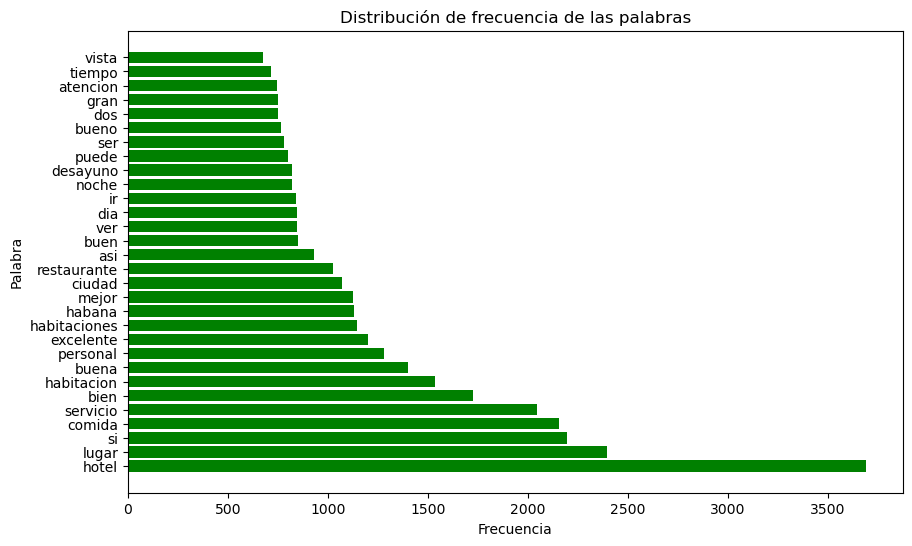

In [88]:
sortedFirst = df_Frecuencias.copy().sort_values(by=['frecuencia'], ascending=False).head(30)



fig = plt.figure(figsize=(10, 6))
plt.barh(sortedFirst['palabra'], sortedFirst['frecuencia'], color='green')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Distribución de frecuencia de las palabras')
plt.show()

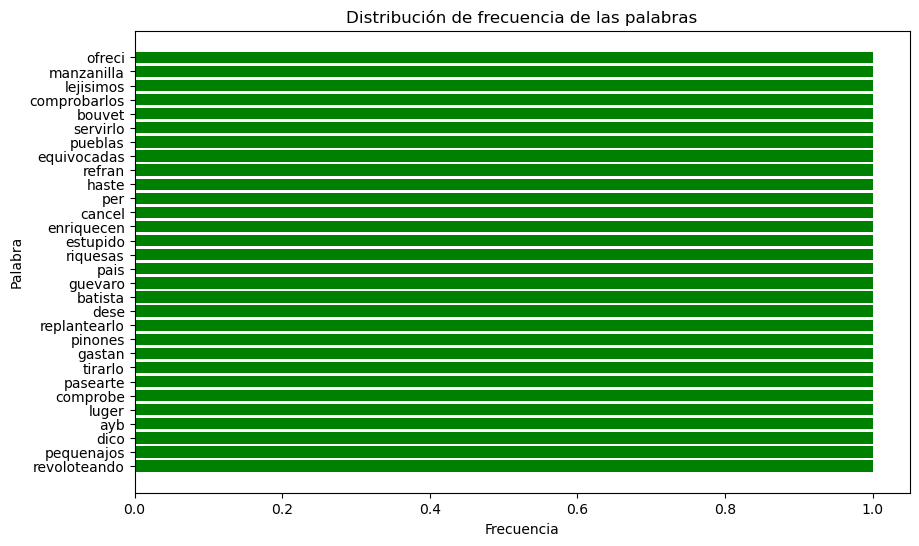

In [89]:
sortedLast= df_Frecuencias.copy().sort_values(by=['frecuencia'], ascending=False).tail(30)

fig2 = plt.figure(figsize=(10, 6))
plt.barh(sortedLast['palabra'], sortedLast['frecuencia'], color='green')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Distribución de frecuencia de las palabras')
plt.show()

Analisis corto de lo que sucede tras el preprocessing, palabras más relevantes etc...
**TO DO

In [90]:
x_train, y_train = x_train['tokens'],x_train['Class']
x_val, y_val = x_val['tokens'],x_val['Class']
x_test, y_test = x_test['tokens'],x_test['Class']

## 3. Embedding del texto: 
Transformación del texto en formato para la máquina

#### 3.1 Count Vectorizer
Utilización del conteo de palabras presentes como Vectorizer -> No creo que sea tan bueno

In [91]:
count = CountVectorizer()
x_train_countVectorizer = count.fit_transform(x_train)
print(x_train_countVectorizer.shape)
x_train_countVectorizer.toarray()[3]


count = CountVectorizer()
x_val_countVectorizer = count.fit_transform(x_val)
print(x_val_countVectorizer.shape)
x_val_countVectorizer.toarray()[3]


count = CountVectorizer()
x_test_countVectorizer = count.fit_transform(x_test)
print(x_test_countVectorizer.shape)
x_test_countVectorizer.toarray()[3]

(3218, 15637)
(1073, 8532)
(3511, 16337)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### 3.1 TfiDf

In [92]:
tfidf = TfidfVectorizer()
x_train_tfidfVectorizer = tfidf.fit_transform(x_train)
print(x_train_tfidfVectorizer.shape)
x_train_tfidfVectorizer.toarray()[3]

df_train = pd.DataFrame(x_train_tfidfVectorizer[0].T.todense(),
    	index=tfidf.get_feature_names_out(), columns=["TF-IDF"])
df_train = df_train.sort_values('TF-IDF', ascending=False)
df_train.head(20)


(3218, 15637)


,TF-IDF
plagas,0.323159
considerable,0.296441
borde,0.269723
suciedad,0.257447
insectos,0.254093
cierran,0.248152
funcionan,0.245492
cucarachas,0.236380
puertas,0.232522
tamaño,0.210690


In [93]:
tfidf = TfidfVectorizer()
x_test_tfidfVectorizer = tfidf.fit_transform(x_test)
print(x_train_tfidfVectorizer.shape)
x_train_tfidfVectorizer.toarray()[3]

df_test = pd.DataFrame(x_test_tfidfVectorizer[0].T.todense(),
    	index=tfidf.get_feature_names_out(), columns=["TF-IDF"])
df_test = df_test.sort_values('TF-IDF', ascending=False)
df_test.head(20)


(3218, 15637)


,TF-IDF
observas,0.432714
tranquilamente,0.385907
arreglado,0.376593
camina,0.368719
malecon,0.317711
pocos,0.263415
vendedores,0.253333
mar,0.227087
hermoso,0.226633
bueno,0.172197


In [94]:
tfidf = TfidfVectorizer()
x_val_tfidfVectorizer = tfidf.fit_transform(x_val)
print(x_train_tfidfVectorizer.shape)
x_train_tfidfVectorizer.toarray()[3]

df_val = pd.DataFrame(x_val_tfidfVectorizer[0].T.todense(),
    	index=tfidf.get_feature_names_out(), columns=["TF-IDF"])
df_val = df_val.sort_values('TF-IDF', ascending=False)
df_val.head(20)


(3218, 15637)


,TF-IDF
hop,0.389713
mármol,0.360780
cuc,0.294899
costes,0.206339
rechazo,0.206339
hermosamente,0.194857
inmediaciones,0.194857
decorados,0.194857
on,0.194857
tardan,0.186709


### 4. Construcción de los modelos

Recursos utilizados: 
https://medium.com/escueladeinteligenciaartificial/procesamiento-de-lenguaje-natural-stemming-y-lemmas-f5efd90dca8
https://neptune.ai/blog/vectorization-techniques-in-nlp-guide
https://gitlab.virtual.uniandes.edu.co/ISIS3301/practicas/blob/master/ProcesamientoTextos/Preparaci%C3%B3n_de_textos_estudiante.ipynb
